In [1]:
library(survival)
library(survminer) 
library(tidyverse)
library(dplyr)

Loading required package: ggplot2

Loading required package: ggpubr

Loading required package: magrittr

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()



In [2]:
pth <- '../data/TARGET-osteo-TH-assignment-survival.tsv'

surv <- read.table(pth,
                  sep='\t',
                  header=T)

surv <- surv[which(surv$cluster == 1 | surv$cluster == 0), ]

surv <- dplyr::as_tibble(surv)

Saving 6.67 x 6.67 in image



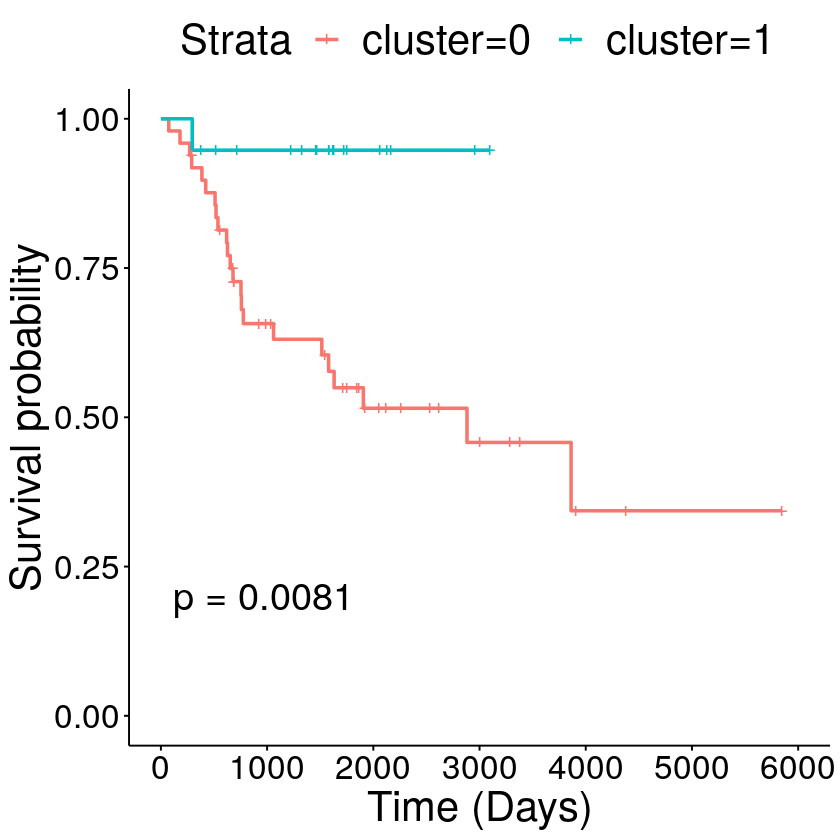

In [8]:
fit <- survfit(Surv(OS, vital) ~ cluster, data=surv)
g <- ggsurvplot(fit, conf.int=F, pval=T, risk.table=F,
                xlab="Time (Days)",
                font.main = c(25, "plain", "black"),
                font.x=c(25, "plain", "black"),
                font.y=c(25, "plain", "black"),
                font.legend=c(25, "plain", "black"),
                font.tickslab=c(20, "plain", "black"), 
                pval.size=8)

ggsave( "../img/TARGET-osteo-cluster-OS-survival.png", 
       print(g), 
       dpi = 1000 )
g

Saving 6.67 x 6.67 in image



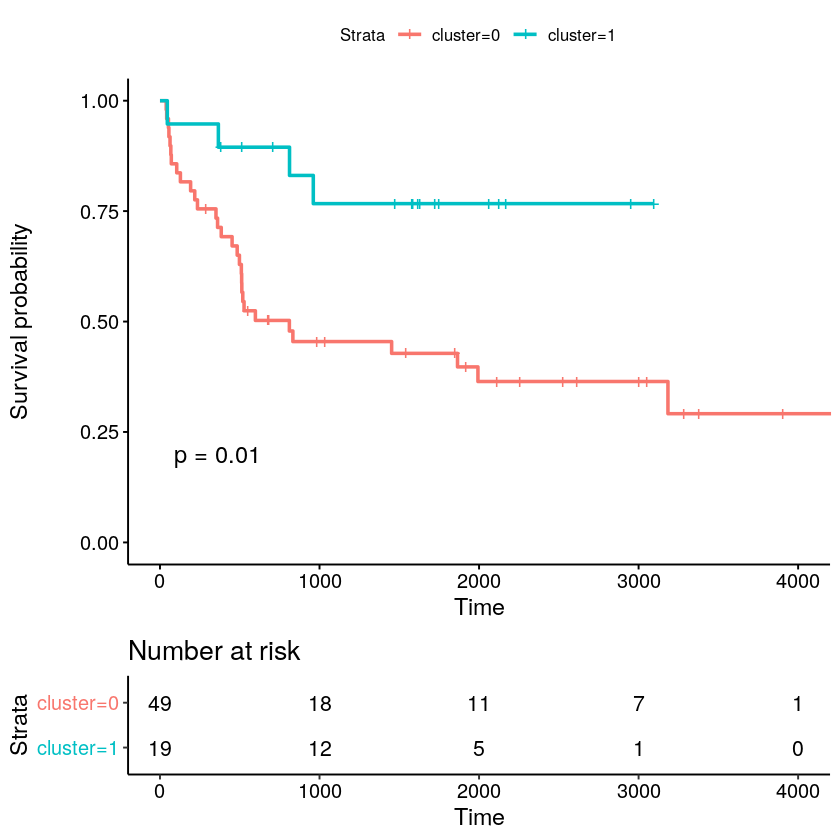

In [4]:
fit <- survfit(Surv(EFS, event) ~ cluster, data=surv)
g <- ggsurvplot(fit, conf.int=F, pval=T, risk.table=TRUE)
ggsave( "../img/TARGET-osteo-cluster-OS-survival.png", 
       print(g), 
       dpi = 1000 )
g